In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [7]:
data = pd.read_csv('santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [14]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0, stratify = y)

In [18]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [19]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [20]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [21]:
X_train_T.duplicated().sum()

18

In [22]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]

In [23]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [24]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

# Caculate th eMI

In [25]:
mi = mutual_info_classif(X_train_unique, y_train)

In [26]:
len(mi)

227

In [27]:
mi

array([2.66374042e-03, 5.83982777e-04, 1.30310350e-02, 0.00000000e+00,
       0.00000000e+00, 1.47462000e-03, 0.00000000e+00, 2.85440247e-03,
       0.00000000e+00, 6.41224350e-04, 9.44567166e-04, 0.00000000e+00,
       0.00000000e+00, 1.93834322e-03, 2.11995668e-03, 8.81817321e-04,
       0.00000000e+00, 1.29784011e-03, 1.83944147e-04, 3.69755097e-05,
       0.00000000e+00, 3.74796104e-03, 7.96609162e-03, 2.88696214e-04,
       0.00000000e+00, 1.42285864e-03, 2.95151389e-04, 3.06414868e-03,
       0.00000000e+00, 1.95791173e-03, 0.00000000e+00, 2.11584040e-03,
       0.00000000e+00, 0.00000000e+00, 5.17508381e-04, 1.87868626e-03,
       1.66919170e-03, 5.41989113e-04, 1.42319927e-02, 0.00000000e+00,
       7.21416086e-04, 3.58835092e-03, 5.01466191e-03, 0.00000000e+00,
       0.00000000e+00, 7.94702959e-03, 5.38158561e-03, 1.11398255e-02,
       1.46124875e-03, 1.18140783e-03, 0.00000000e+00, 0.00000000e+00,
       7.48062136e-04, 1.26853741e-03, 2.51469757e-03, 4.36883763e-04,
      

In [28]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

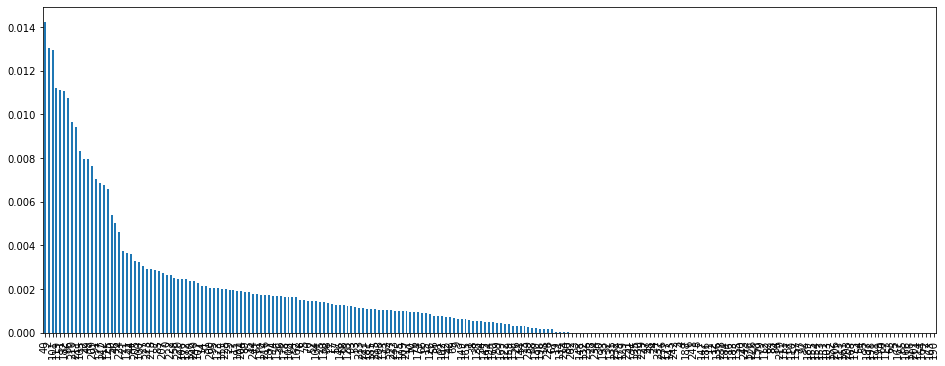

In [29]:
mi.sort_values(ascending=False, inplace=True)
mi.plot.bar(figsize = (16,6))

In [30]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  29,  40,  49,  50,  51,  86,  91,  98, 101, 105, 111,
            119, 125, 127, 169, 182, 209, 210, 211, 212, 223],
           dtype='int64')

In [31]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x00000250842BF9D8>, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature scores, None if `score_func` returned on

In [33]:
len(X_train_unique.columns[sel.get_support()])

23

In [34]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [35]:
X_train_mi.shape

(16000, 23)

# Mutual Gain in Regression

In [39]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
boston = load_boston()

In [41]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y = boston.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

In [51]:
mi

LSTAT      0.677460
RM         0.560936
INDUS      0.510594
PTRATIO    0.472846
NOX        0.445622
TAX        0.383742
CRIM       0.354290
AGE        0.341534
DIS        0.321919
RAD        0.209355
ZN         0.201819
B          0.150408
CHAS       0.028718
dtype: float64

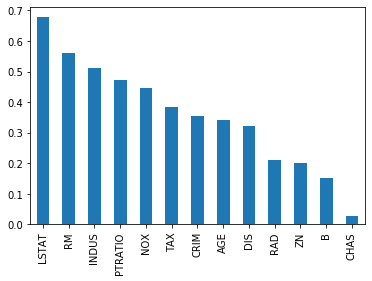

In [52]:
mi.plot.bar()